# Sobreajuste y Regularización

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/ML_2020/master/init.py
import init; init.init(force_download=False); 

### Julián D. Arias Londoño

Profesor Asociado  
Departamento de Ingeniería de Sistemas  
Universidad de Antioquia, Medellín, Colombia  
julian.ariasl@udea.edu.co

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Sobreajuste

El sobreajuste es un fenómeno que puede ocurrir en el ajuste de modelos estadísticos o de aprendizaje automático, en el que el modelo se aprende muy bien la respuesta a las muestras que han sido usadas durante el entrenamiento, pero no captura la estructura subyacente de los datos, razón por la cual no puede <b>generalizar</b> correctamente, es decir, hacer predicciones precisas sobre nuevas muestras. El comportamiento opuesto al sobreajuste es el <b>subajuste</b>, en cuyo caso el modelo no puede ajustarse a los datos de entrenamiento. Ningunos de los dos comportamientos es deseado, ya que en ninguno de los dos casos el modelo adquiere la capacidad de realizar predicciones apropiadas. 

Para identificar que un modelo se ha sobreajustado es importante que durante la validación se estimen las medidas de desempeño tanto en el conjunto de entrenamiento como en el de test. Si se obtienen errores de entrenamiento muy bajos (0 a proximadamente 0), pero en el conjunto de test se obtienen errores muy altos, el modelo se ha sobreajustado. Si tanto en el conjunto de entrenamiento como en el de test, los errores son altos y en proporciones similares, entonces el modelo está subajustado. En este caso es posible que algún parámetro en el modelo no haya permitido un mejor ajuste del mismo (por ejemplo un nivel de profundidad muy pequeño en un árbol de decisión), que en el caso de algoritmos de entrenamiento iterativos, el número máximo de iteraciones no haya sido suficiente, o que definitvamente el modelo escogido no tiene la flexibildiad suficiente para adpatarse a la estructura subyacente de los datos con losq ue está siendo entrenado. 

None


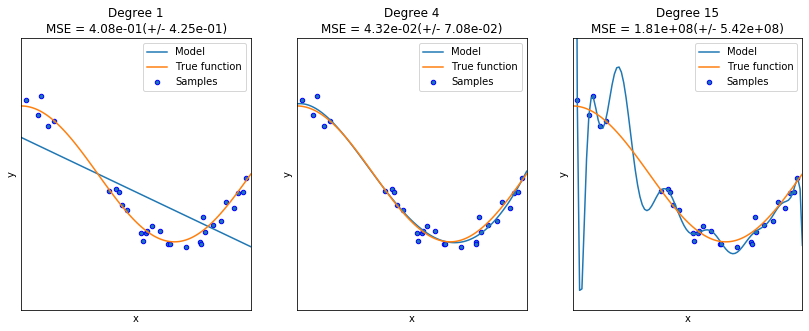

In [2]:
import library.regularization as reg
reg.PrintOverfittingReg()

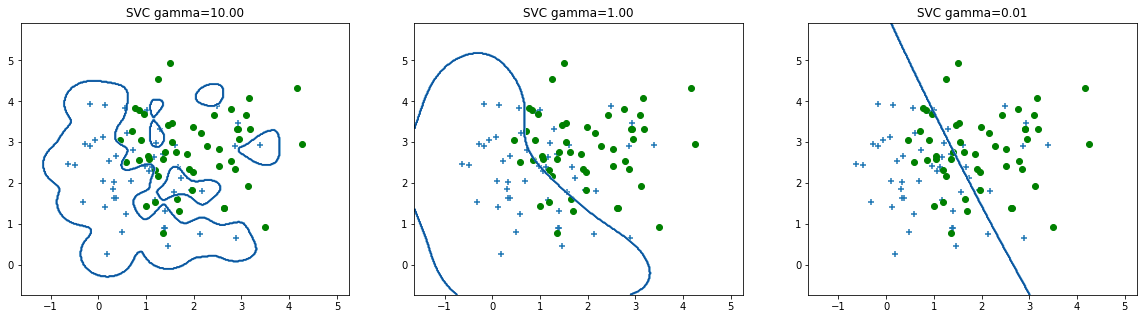

In [3]:
reg.PrintOverfittingClassify()

<b>Causas del sobreajuste</b>:

De manera general el sobreajuste puede presentarse por las siguientes razones:

- Muestras de entrenamiento muy ruidosas
- Un modelo demasiado complejo que se ajuste al ruido

y/o

- Un conjunto de entrenamiento pequeño
- Un espacio de características de muy alta dimensión

El ruido en los datos puede provenir de diferentes fuentes dependiendo del origen de los mismos, por ejemplo en datos provenientes de sensores (como en aplicaciones que usan el acelerómetro o el giroscopio de los smartphones), el rudio puede provenir por alteraciones en las mediciones debida a movimientos indeceados, o en el reconocimiento de voz, por ruidos captados por el micrófono y que no son en realidad la voz de la persona que está hablando al sistema. Cuando los datos provienen de bases de datos estructuradas, podemos tener ruido cuando, por ejemplo, algún campo contiene información desactualizada sobre un usuario. En problemas supervisados, el ruido también puede estar en presente en la variable de salida; algunas aplicaciones que usan etiquetas obtenidas desde internet, por ejemplo captchas, podrían eventualmente tener problemas con etiquetas ruidosas. 

Sin embargo, el sobreajuste se presenta no sólo cuando existe ruido en los datos, sino cuando usamos un modelo suficientemente flexible para adapatarse a dicho ruido. Por ejemplo, una regresión logística que use un polinomio de grado 1, no podrá sobreajustarse nunca, porque su flexibilidad está limitada a un número de parámetros bajo ($d+1$). Sin embargo, modelos con mayor flexibilidad, es decir, con un número de parámetros mayor son más susceptibles al sobreajuste. Por lo tanto, una de las alternativas para evitar el sobreajuste es precisamente reducir la flexibilidad del modelo, limitando el rango de posibles valores que pueden tomar sus parámetros.

### Parada anticipada

El problema del sobreajuste debe ser abordado desde diferente frentes. El primero de ellos es utilizar una metodología de validación apropiada. Hasta el momento nosotros hemos discutido la necesidad de dividir el conjunto de muestras en dos conjuntos (Entrenamiento y Validación) y repetir el proceso de entrenamiento y validación varias veces. Sin embargo, en problemas en los que debemos seleccionar hiperparámetros de los modelos, es decir, parámetros que no se ajustan durante el entrenamiento sino que típicamente escogemos a partir de evaluar el error durante la validación, es necesario hacer una partición en tres subconjuntos: <b> Entrenamiento, Validación y Test </b>. 

- Entrenamiento: es el subconjunto utilizado para ajustar los parámetros del modelo elejido.
- Validación: es un subconjunto utilizado para evitar el sobreajuste y decidir cuándo detener el entrenamiento o para seleccionar los hiperparámetros del modelo. En alguna literatura en inglés, a este subconjunto también se le llama "Development".
- Test: es un subconjunto utilizado para evaluar la capacidad de generalización del modelos entrenado.

De esa manera podemos garantizar que el conjunto de test no ha sido usado ni para el ajuste de los parámetros del modelo, ni para la selección de los hiperparámetros del mismo. En todos los casos, se deben hacer varias repeticiones usando metodologı́as como validación cruzada o bootstrapping, para obtener medidas de desempeño ± IC.

Adicionalmente, en modelos muy flexibles que cuentan con un número de parámetros muy elevado (por ejemplo en las redes neuronales artificiales), se suele usar una estrategia para evitar el sobreajuste llamada parada anticipada. Esta estrategia consiste en evaluar el error en el conjunto de entrenamiento y el error en el conjunto de validación durante cada época o iteración del algoritmo de entrenamiento, cuando el error de validación deja de reducirse, aunque el error de entrenamiento continúe disminuyendo, el algoritmo de entrenamiento se detiene. Esto evita que el algoritmo continúe ajustándose a los datos de entrenamiento, pero deje de representar la estructura subyacente en los datos del problema que se está modelando.

<img src="./Images/ParadaAnticipada.png" alt="ParadaAnticipada" width="600"/>

En Sklearn:

**early_stopping: bool**, default=False

    Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. The split is stratified, except in a multilabel setting. Only effective when solver='sgd' or 'adam'.

## Regularización

La regularización es un método matemático que permite reducir los efectos del ruido en problemas inversos imponiendo algún tipo de restricción en la función objetivo. Particularmente en el caso de la regresión lineal se determinó que cuando se presenta sobreajuste los coeficientes del polinomio tienden a aumentar en maginitud. La función objetivo
regularizada está dada por:

$$E({\bf{w}}) = \frac{1}{2}\sum_{i=1}^{N}\left( y_i - f({\bf{x}}_i,{\bf{w}})\right) ^2 + \frac{\lambda}{2}\|{\bf{w}}\|^2$$

Entre mayor sea el valor de $\lambda$, mayor será la penalización por complejidad del modelo.

Dado un conjunto de datos de entrenamiento $\{({\bf{x}}_i,y_i)\}_{i=1}^{N}$, siendo ${\bf{x}}_i$ un vector que contiene todas las características de la muestra $i$ y $y_i$ el correspondiente valor de la variable que se desea predecir a partir de ${\bf{x}}_i$,  la regla de actualización de pesos regularizada para el algoritmo de gradiente estará dada por:
$$w_j = w_j - \eta \left( \lambda w_j + \sum_{i=1}^{N} \left( f({\bf{x}}_i,{\bf{w}}) - y_i\right)x_{ij} \right)  $$

La solución analítica regularizada para el problema de regresión está dada por:
$${\bf{w}} = \left( {\bf{X}}^T {\bf{X}} + \lambda {\bf{I}} \right)^{-1} {\bf{X}}^T {\bf{Y}}$$

Para la regresión logística, la regla de actualización de pesos toma una forma similar a la anterior, con la diferencia de que como ya hemos estudiado, la función de costo para el entrenamiento se deriva de la aplicación del criterio de máxima verosimilitud sobre una distribución bernoulli, y la probabilidad de que una muestra pertenezca a la clase 1 se estima a través de la función sigmoide evaluada en la función polinomial, es decir la probabilidad de que ${\bf{x}}_i$ pertenezca a la clase 1 es igual a $g(f({\bf{x}}_i,{\bf{w}}))$, donde $g(\cdot)$ es la función sigmoidal. La regla de actualización de pesos en este caso está dada por:

$$w_j = w_j - \eta \left( \lambda w_j + \sum_{i=1}^{N} \left( g\left(f({\bf{x}}_i,{\bf{w}})\right) - y_i\right)x_{ij} \right)  $$

**Veamos un ejemplo**.  

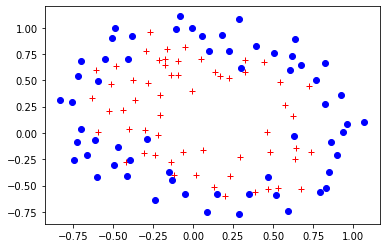

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt("DataFiles/ex2data2.txt",delimiter=",")
X = data[:, [0, 1]]; Y = data[:, 2];
plt.plot(X[Y.flat==1,0],X[Y.flat==1,1],'r+')
plt.plot(X[Y.flat==0,0],X[Y.flat==0,1],'bo')

Veamos la frontera que produce una regresión logística estándar, en este caso para un polinomio de grado 6.

Error= 0.17924839740742132


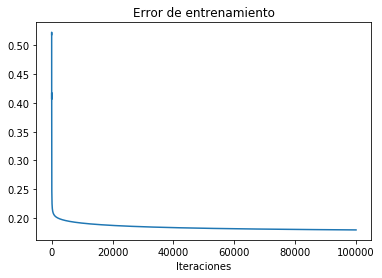

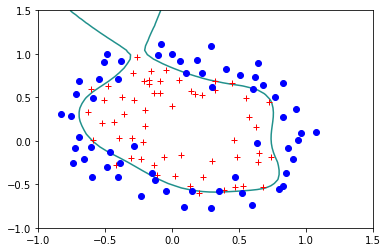

In [5]:
reg.StandardLogisticRegression(X,Y)

Veamos ahora que sucede si usamos la version regularizada dándole un valor a $\lambda$ diferente de cero:

Error= 0.2507583326384995


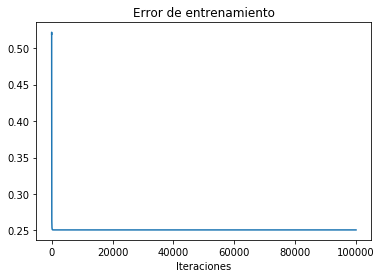

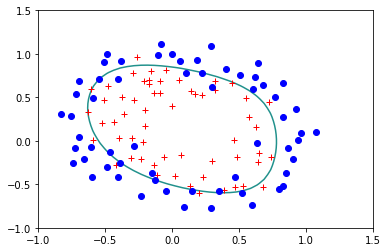

In [6]:
reg.StandardLogisticRegression(X,Y,lam=0.1)

Error= 0.33604518076771783


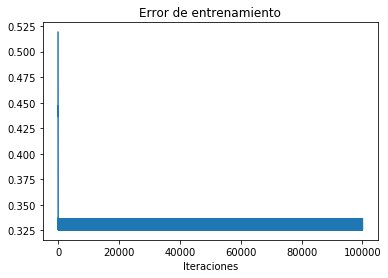

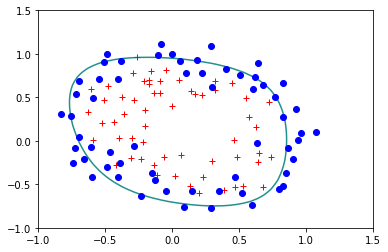

In [7]:
reg.StandardLogisticRegression(X,Y,lam=0.5)

Error= 0.39341073848662333


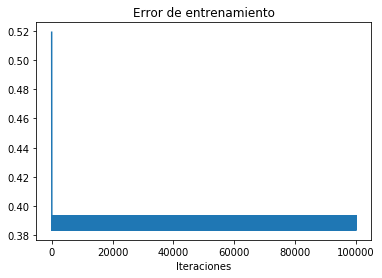

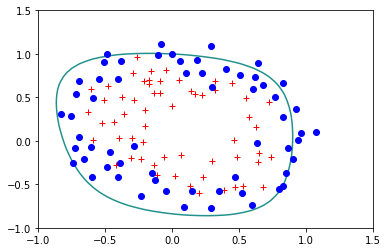

In [8]:
reg.StandardLogisticRegression(X,Y,lam=1)

La restricción que estamos usando en el término de regularización corresponde a la norma $L_2$ del vector $\bf{w}$. También es posible usar otro tipo de normas, entre ellas la norma $L_1$ es también muy usada, ya que garantiza no sólo que la magnitud de los pesos en el vector $\bf{w}$ no se desboder, sino que además causa que algunos de los pesos tomen un valor de cero. La regresión con este tipo de regularización se conoce como LASSO y será analizada en detalle más adelante en el curso.

<img src="./Images/L1L2.png" alt="ParadaAnticipada" width="600"/>

In [9]:
from sklearn import linear_model, datasets
diabetes=datasets.load_diabetes()
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [10]:
clf=linear_model.Lasso(alpha=0.5)
clf.fit(diabetes.data,diabetes.target)
print(clf.coef_)

[  0.          -0.         471.03873321 136.50710814  -0.
  -0.         -58.3195488    0.         408.02332435   0.        ]


## La maldición de la dimensionalidad

El segundo par de razones listadas previamente y que pueden causar sobreajuste, configuran un problema conocido como la <b>Maldición de la Dimensionalidad</b> y que se presenta cuando el espacio de características tiene una dimensión muy grande, pero el número de muestras disponible en la base de datos es pequeño, en cuyo caso el espacio entre muestras suele ser muy grande y los modelos tienden a memorizar las salidas para las pocas muestras de entrenamiento con las que se cuenta. Entre mayor sea el número de variables, mayor debería ser el número de muestras para evitar que este problema se presente. Debido a que en la actualidad en muchos sectores de aplicación se cuenta con grandes volúmenes de información, ya no se discute muy a menudo sobre la maldición de la dimensionalidad; sin embargo, existen problemas en los que construir una base de datos con un número grande de muestras sigue siendo un problema. Por ejemplo, en el desarrollo de sistemas de apoyo diagnóstico, la maldición de la dimensionalidad sigue siendo tenida en cuenta porque para algunos tipos de enfermedades, aún no existen bancos de datos con información proveniente de un gran número de pacientes.

En problemas en los que se debe lidiar con la maldición de la dimensionalidad, la alternativa es reducir el número de variables, evaluando la capacidad predictiva de las variables, de tal manera que se pueda obtener un subconjunto de características más pequeño, pero que conserve la capacidad predictiva del conjunto de variables original. En la clase sobre Selección de características abordaremos en detalle este problema y estudiaremos las técnicas que pueden ser empleadas para tal fin.